In [1]:
## download our dataset
#!kaggle datasets download -d blastchar/telco-customer-churn

In [2]:
## lets unzip the file
#!unzip telco-customer-churn.zip 

### Initial data preparation 

In [3]:
## import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

In [4]:
## read the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
## lets check the number of rows in the dataset
len(df)


7043

In [6]:
## lets examine a couple of rows 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
## lets transpose the dataframe to view all columns
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [8]:
## lets check the column types of the dataframe
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
## let change the column type of TotalCharges to numeric

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [10]:
## lets normalize the data in our dataframe
## change the column names to lowercase and replace spaces with underscore

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
## lets select string columns and normalize their data
## change the data to lower case and replaces all spaces with underscore

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [12]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [13]:
## lets convert our target variable to numeric

df.churn = (df.churn == 'yes').astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [14]:
## lets divide our dataset for the purposes of training into
## training set 60%
## validation set 20%
## test set 20%
from sklearn.model_selection import train_test_split

df_train_full, df_valid = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_test = train_test_split(df_train_full, test_size=0.33, random_state=11)



In [15]:
print(f'Training dataset: {len(df_train)}')
print(f'Testing dataset: {len(df_test)}')
print(f'Validation dataset: {len(df_valid)}')


Training dataset: 3774
Testing dataset: 1860
Validation dataset: 1409


In [16]:
## lets select the target column from the dataset
y_train = df_train.churn.values
y_valid = df_valid.churn.values
y_test = df_test.churn.values 

In [17]:
## lets deletes the target column from the dataset
del df_train['churn']
del df_valid['churn']
del df_test['churn']

### Exploratory data analysis

In [18]:
## lets check for missing values in the dataset
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [19]:
## lets check the distribution of the values in the target variables
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [20]:
## check the proportion of churned users against all customers
1521 / 5634

0.26996805111821087

In [21]:
## lets use the mean method to calculate the churn rate
global_churn_rate = df_train_full.churn.mean()
round(global_churn_rate, 2)

0.27

In [22]:
## lets create a list of categorical and numerical varialbes in the dataset

categorical_var = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
                  'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 
                  'deviceprotection','techsupport','streamingtv', 'streamingmovies', 
                  'contract', 'paperlessbilling', 'paymentmethod']

numerical_var = ['tenure', 'totalcharges', 'monthlycharges']

In [23]:
#df.head().T

In [24]:
## let check how many unique values each categorical variables has
df_train_full[categorical_var].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature importance

In [25]:
## let calculate the churn rate for the categorical variables 
## lets start with the gender cat variable

female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()

print(f'Female churn rate: {round(female_mean, 2)}')
print(f'Male churn rate: {round(male_mean, 2)}')


Female churn rate: 0.28
Male churn rate: 0.26


In [26]:
## lets check that of the partner cat variable
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()

partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()

print(f'No partner churn rate: {round(partner_no, 2)}')
print(f'Yes partner churn rate: {round(partner_yes, 2)}')

No partner churn rate: 0.33
Yes partner churn rate: 0.21


### Risk Ratio
calculating the risk ration for the entire group.

In [27]:
global_mean = df_train_full.churn.mean()



In [28]:
## calculate the avg(churn)
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
## cal the diff b/n the group churn rate and global churn rate
df_group['diff'] = df_group['mean'] - global_mean
## cal the risk of churning 
df_group['risk'] = df_group['mean'] / global_mean

In [29]:
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [30]:
## calculating the risk ration for all cat var
from IPython.display import display

## lets through all the cat var
for col in categorical_var:
    ## lets perform groupby for each cat var
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['rate'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,rate
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,rate
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,rate
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,rate
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,rate
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,rate
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,rate
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,rate
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,rate
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,rate
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,rate
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,rate
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,rate
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,rate
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


### Mutual Information


In [31]:
## lets import our library
from sklearn.metrics import mutual_info_score

##lets creates a stand-aline function for calculating mutual info
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

## let apply the function to each column of the dataset
df_mi = df_train_full[categorical_var].apply(calculate_mi)
## let apply the function to each cat column of the dataset
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [32]:
### Correlation Coefficient 

In [33]:
df_train_full[numerical_var].corrwith(df_train_full.churn)

tenure           -0.351885
totalcharges     -0.196353
monthlycharges    0.196805
dtype: float64

### Feature Engineering 

In [34]:
## 
train_dict = df_train[categorical_var + numerical_var].to_dict(orient='records')

In [35]:
##
from sklearn.feature_extraction import DictVectorizer

dict_vec = DictVectorizer(sparse=False)
dict_vec.fit(train_dict)

## convert
X_train = dict_vec.transform(train_dict)

## Machine learning for classification
### Logistic regression
#### Training a logistic regression

In [36]:
## lets import our model
from sklearn.linear_model import LogisticRegression

## lets create an instance of LogReg
clf = LogisticRegression(solver='liblinear', random_state=1)
clf.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

### Lets check how well our model performed. 
For us to check our well our model performed, we have to use <br>
the validation data to obtain the probability of churn for each <br>
customer in the validation dataset. 

In [37]:
valid_dict = df_valid[categorical_var + numerical_var].to_dict(orient='records')
## convert it to a dictionary list
## lets transform
X_valid = dict_vec.transform(valid_dict)

In [38]:
## lets make our predictions
y_pred = clf.predict_proba(X_valid)[:,1]

In [39]:
## lets convert our predictions (soft) into a hard predictions
## by setting a threshold value for churn

churn = y_pred >= 0.5 


In [40]:
## lets cal the accuracy of our model 
## by comparing it predictions to our actual value

(y_valid == churn).mean()

0.8069552874378992

### Using the model 

In [41]:
## lets get the customer data
customer = {
'customerid': '8879-zkjof',
'gender': 'female',
'seniorcitizen': 0,
'partner': 'no',
'dependents': 'no',
'tenure': 41,
'phoneservice': 'yes',
'multiplelines': 'no',
'internetservice': 'dsl',
'onlinesecurity': 'yes',
'onlinebackup': 'no',
'deviceprotection': 'yes',
'techsupport': 'yes',
'streamingtv': 'yes',
'streamingmovies': 'yes',
'contract': 'one_year',
'paperlessbilling': 'yes',
'paymentmethod': 'bank_transfer_(automatic)',
'monthlycharges': 79.85,
'totalcharges': 3320.75,
}

In [42]:
## lets convert this dictionary to a matrix 
X_test = dict_vec.transform([customer])
clf.predict_proba(X_test)[0, 1]

0.07332111084949638

In [43]:
customer = {
'gender': 'female',
'seniorcitizen': 1,
'partner': 'no',
'dependents': 'no',
'phoneservice': 'yes',
'multiplelines': 'yes',
'internetservice': 'fiber_optic',
'onlinesecurity': 'no',
'onlinebackup': 'no',
'deviceprotection': 'no',
'techsupport': 'no',
'streamingtv': 'yes',
'streamingmovies': 'no',
'contract': 'month-to-month',
'paperlessbilling': 'yes',
'paymentmethod': 'electronic_check',
'tenure': 1,
'monthlycharges': 85.7,
'totalcharges': 85.7
}


In [44]:
X_test = dict_vec.transform([customer])
clf.predict_proba(X_test)[0,1]

0.8321656556055403

### Target variable analysis

### Classification accuracy
Accuracy is define as the percentage of the correct predictions a model makes. 

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
thresholds = np.linspace(0, 1, 11)

In [47]:
for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_valid, churn)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.247
0.10 0.610
0.20 0.708
0.30 0.764
0.40 0.787
0.50 0.807
0.60 0.817
0.70 0.794
0.80 0.762
0.90 0.753
1.00 0.753


In [48]:
## lets make a plot of accuracy vs thresholds
thresholds = np.linspace(0, 1, 11)
accuracies = []

for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_valid, churn)
    accuracies.append(acc)

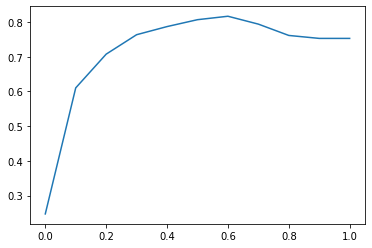

In [49]:
plt.plot(thresholds, accuracies)



### Dummy baseline 

### Confusion table 
A confusion table refers to a table that concisely represents 
every possible outcome for our model predictions. <br>

TRUE POSITIVE: We predicted a true outcome, and it turned out to be true. <br>
FALSE POSITIVE: We predicted a false outcome, and it turned out to be false. <br>
TRUE NEGATIVE: We predicted a false outcome, and it turned out to be true. <br>
FALSE NEGATIVE: We predicted a false outcome, and it turned out to be false. <br>

### Calculating the confusion table with NumPy


In [50]:
## makes predictions at threshold 0.6
t = 0.6 
predicted_churn = (y_pred >= t)
predicted_no_churn = (y_pred < t)

## gets the actual target values 
actual_churn = (y_valid == 1)
actual_no_churn = (y_valid == 0)

## cal true positives 
true_positive = (predicted_churn & actual_churn).sum()
## cal true negatives
false_positive = (predicted_churn & actual_no_churn).sum()

## cal false positives
true_negative = (predicted_no_churn & actual_no_churn).sum()

## cal false negatives
false_negative = (predicted_no_churn & actual_churn).sum()

In [51]:
## lets puts all in a confusion table
confusion_table = np.array([
    [true_negative, false_negative],
    [false_positive, true_positive]
])

print(confusion_table)

[[993 190]
 [ 68 158]]


In [52]:
confusion_table / confusion_table.sum()

array([[0.70475515, 0.13484741],
       [0.04826118, 0.11213627]])

### Precision and Recall
- Precision <br>
The precision of a model tells us how many of the positive predictions turned out to be correct. <br>
It is the fraction of correctly predicted positive examples <br>
P = TP / (TP + FP) <br>

- Recall
Recall is the fraction of correctly classified positive examples among all positive examples. <br>
R = TP / (TP + FN)

In [53]:
## lets cal the precision score
precision = true_positive / (true_positive + false_positive)
print(f'Prrcision Score: {round(precision, 2) * 100}%')

Prrcision Score: 70.0%


In [54]:
## lets cal the recal score
recall = true_positive / (true_positive + false_negative)
print(f'Recall Score: {round(recall, 2) * 100}%')

Recall Score: 45.0%


## ROC curve and AUC score
The receiver operating characteristic is use to show how a model sperate two classes, positive and negative. <br>
To do this, ROC needs two metrics, which are the true positive rate (TPR) and the false positive rate (FPR). <br>

### True positive rate and false positive rate 

- TPR: is the fraction of true positive among all positive examples. 
TPR = TP / (TP + FN) 
- FPR: is the fraction of false positive among all negative examples. 

FPR = FP / (FP + TN)

In [55]:
### 
true_positive_rate = true_positive / (true_positive + false_negative)
print(f'TPR: {round(true_positive_rate,2) * 100} %')
##
false_positive_rate = false_positive / (false_positive + true_negative)
print(f'TPR: {round(false_positive_rate, 2) * 100} %')

TPR: 45.0 %
TPR: 6.0 %


### Evaluating a model at multiple thresholds

In [56]:
scores = []

## lets create an array with different threshold values
## and loop over them
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    ## lets computes the confusion table for predictions at each threshold 
    tp = ((y_pred >= t) & (y_valid == 1)).sum()
    fp = ((y_pred >= t) & (y_valid == 0)).sum()
    fn = ((y_pred < t) & (y_valid == 1)).sum()
    tn = ((y_pred < t) & (y_valid == 0)).sum()
    
    ##lets append the results to the score list
    scores.append((t, tp, fp, fn, tn))

In [57]:
## lets converts the list to a list of tup;es
df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [58]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,348,1061,0,0
10,0.1,337,538,11,523
20,0.2,315,379,33,682
30,0.3,279,264,69,797
40,0.4,254,206,94,855
50,0.5,206,130,142,931
60,0.6,158,68,190,993
70,0.7,83,25,265,1036
80,0.8,12,0,336,1061
90,0.9,0,0,348,1061


In [59]:
## lets compute the TPR and FPR scores 
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [60]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,348,1061,0,0,1.000000,1.000000
10,0.1,337,538,11,523,0.968391,0.507069
20,0.2,315,379,33,682,0.905172,0.357210
30,0.3,279,264,69,797,0.801724,0.248822
40,0.4,254,206,94,855,0.729885,0.194156
50,0.5,206,130,142,931,0.591954,0.122526
60,0.6,158,68,190,993,0.454023,0.064090
70,0.7,83,25,265,1036,0.238506,0.023563
80,0.8,12,0,336,1061,0.034483,0.000000
90,0.9,0,0,348,1061,0.000000,0.000000


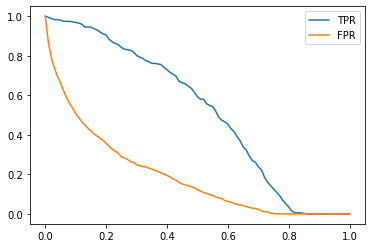

In [61]:
##
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()

### Random baseline model 
A random model outputs a random score between 0 and 1, regardless of the input. 

In [62]:
np.random.seed(1)
##generates an array with random numbers b/n 0 and 1
y_rand = np.random.uniform(0, 1, size=len(y_valid))

In [63]:
##function for calculating TPR and FPR at different thresholds 
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
    ## lets computes the confusion table for predictions at each threshold 
        tp = ((y_pred >= t) & (y_valid == 1)).sum()
        fp = ((y_pred >= t) & (y_valid == 0)).sum()
        fn = ((y_pred < t) & (y_valid == 1)).sum()
        tn = ((y_pred < t) & (y_valid == 0)).sum()
    
        ##lets append the results to the score list
        scores.append((t, tp, fp, fn, tn))
    
    ## lets converts the list to a list of tup;es
    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    
    ## lets compute the TPR and FPR scores 
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores
    

In [64]:
df_rand = tpr_fpr_dataframe(y_valid, y_rand)

In [65]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_valid))
df_rand = tpr_fpr_dataframe(y_valid, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,348,1061,0,0,1.000000,1.000000
10,0.1,307,963,41,98,0.882184,0.907634
20,0.2,271,858,77,203,0.778736,0.808671
30,0.3,237,763,111,298,0.681034,0.719133
40,0.4,212,649,136,412,0.609195,0.611687
50,0.5,177,543,171,518,0.508621,0.511781
60,0.6,137,433,211,628,0.393678,0.408106
70,0.7,102,321,246,740,0.293103,0.302545
80,0.8,67,217,281,844,0.192529,0.204524
90,0.9,35,106,313,955,0.100575,0.099906


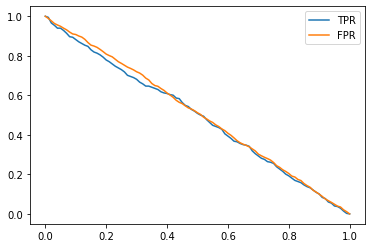

In [66]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()

### The ideal model 
The ideal model always makes correct decision

In [67]:
num_neg = (y_valid == 0).sum()
num_pos = (y_valid == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)

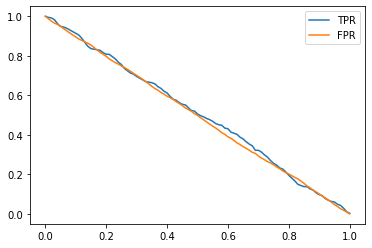

In [68]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()

### ROC Curve 
The goal is to have our model between these two curves (ideal and random model). <br>
We want our model to be as close to the ideal curve as possible and as far as possible <br>
from the random curve. 

We create an ROC curve by plotting the FRR and TPR against each other. 
For comparison, we also add the ideal andrandom models to the plot: <br>


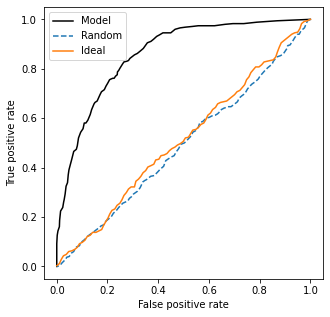

In [69]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model', color='black')
plt.plot(df_rand.fpr, df_rand.tpr, label='Random', linestyle='dashed' )
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal', linestyle='solid')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')


plt.legend()

In [70]:
#help(plt.xlabel)
#help(plt.plot)

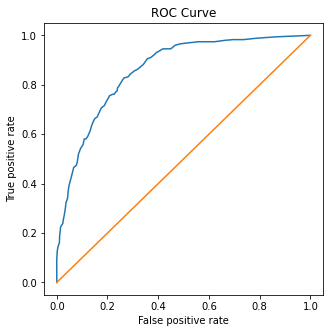

In [71]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0,1], [0, 1])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.title('ROC Curve')

plt.show()

### ROC Curve Plotting Using Scikit-learn 

### Area under the ROC curve (AUC)
When evaluating our model using the ROC curve, we want the model to be as close to ideal spot,<br>
and as far from the random baseline as possible. <br>
We can use the measure the area under the ROC curve to quantify this "closeness",<br>
AUC is also a metric for evaluating the performance of a binary classification model. <br> 
Note:  An AUC of 0.9 is indicative of a reasonably good model; 0.8 is <br>
okay, 0.7 is not very performant, and 0.6 indicates quite poor performance. <br>
ROC curves and AUC scores tell us how well the model separates positive and negative examples. <br>
What is more, AUC has a nice probabilistic interpretation: it tells us what <br> 
the probability is that a randomly selected positive example will have a score higher<br>
than a randomly selected negative example.<br>

In [72]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_valid, y_pred)

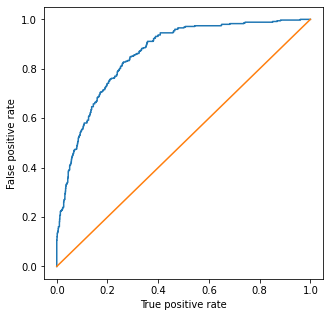

In [73]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Model')
plt.plot([0,1], [0, 1])

plt.xlabel('True positive rate')
plt.ylabel('False positive rate')

plt.show('ROC Curve')

plt.show()

### Using ROC Curve To Compare Multiple Models

In [74]:
fpr_large, tpr_large, _ =  roc_curve(y_valid, y_pred)

#fpr_small, tpr_small, _ = roc_curve(y_valid, y_pred_small)

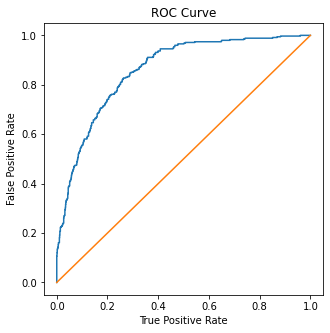

In [75]:
plt.figure(figsize=(5,5))

plt.plot(fpr_large, tpr_large, label='Large')
#plt.plot(fp)
plt.plot([0, 1], [0, 1])

plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

plt.title('ROC Curve')
plt.show()

In [76]:
#Method 1
from sklearn.metrics import auc
auc(df_scores.fpr, df_scores.tpr)

0.8589326919951898

In [77]:
#Method 2
from sklearn.metrics import roc_auc_score

roc_auc_score(y_valid, y_pred)

0.8589855048912867

In [78]:
## Parameter tuning 


In [79]:
### K-fold cross-validation

In [80]:
## create a function for model triaing by 
## converts the data into one-hot encoding representation
## trains the model

def train(df, y):
    cat = df[categorical_var + numerical_var].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    
    X = dv.transform(cat)
    
    log_reg_model = LogisticRegression(solver='liblinear')
    log_reg_model.fit(X, y)
    
    return dv, log_reg_model

In [81]:
## create a prediction function 
##by taking in dataframe with customers 
## vectorizer we trained previously
## model 
## Then we apply the vectorizer to the dataframe, get a
## matrix, and finally apply the model to the matrix to get predictions
def predict(df, dv, log_reg_model):
    """
    
    
    """
    cat = df[categorical_var + numerical_var].to_dict(orient='records')
    
    X = dv.transform(cat)
    y_pred = log_reg_model.predict_proba(X)[:, 1]
    
    return y_pred 

In [82]:
## implement K-fold cross-validation
## import kfolds
from sklearn.model_selection import KFold 

## splits the data into 10 parts
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

##creates a list for storing results
aucs = []
##iterates over the 10 different splits of the data
for train_idx, valid_idx in kfold.split(df_train_full):
    
    ## splits the data into train and validation sets
    df_train = df_train_full.iloc[train_idx]
    df_valid = df_train_full.iloc[valid_idx]
    
    
    y_train = df_train.churn.values
    y_valid = df_valid.churn.values 
    
    ##train the model and makes predictions
    dv, log_reg_model = train(df_train, y_train)
    y_pred = predict(df_valid, dv, log_reg_model)
    
    ## evaluates the quality of the train model on the validation data using auc
    auc = roc_auc_score(y_valid, y_pred)
    ##saves the auc to the list with the results
    aucs.append(auc)
    

In [83]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.842 ± 0.012


### Finding best parameters 

In [84]:
## lets create a function for training the model with parameter C for controlling regularization
def train(df, y, C):
    cat = df[categorical_var + numerical_var].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    
    X = dv.transform(cat)
    
    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)
    
    return dv, model

In [87]:
### Tunning the model: selecting the best parameter C using cross-validation
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []
    
    ##iterates over the 10 different splits of the data
    for train_idx, valid_idx in kfold.split(df_train_full):
    
        ## splits the data into train and validation sets
        df_train = df_train_full.iloc[train_idx]
        df_valid = df_train_full.iloc[valid_idx]


        y_train = df_train.churn.values
        y_valid = df_valid.churn.values 

        ##train the model and makes predictions
        dv, log_reg_model = train(df_train, y_train, C=C)
        y_pred = predict(df_valid, dv, log_reg_model)

        ## evaluates the quality of the train model on the validation data using auc
        auc = roc_auc_score(y_valid, y_pred)
        ##saves the auc to the list with the results
        aucs.append(auc)
    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))
    

C=0.001, auc = 0.825 ± 0.013
C=0.01, auc = 0.839 ± 0.009
C=0.1, auc = 0.841 ± 0.008
C=0.5, auc = 0.841 ± 0.007
C=1, auc = 0.841 ± 0.007
C=10, auc = 0.841 ± 0.007


In [ ]:
## let's train our model on the entire training data

In [93]:
y_train = df_train_full.churn.values
#y_test = df_test.churn.values

## trains the model on the full training dataset
dv, model = train(df_train_full, y_train, C=C)
## applies it to the test dataset
y_pred = predict(df_test, dv, model)

##evaluate the predictions on the test data
auc = roc_auc_score(y_test,y_pred)
print('auc = %.3f' % auc)



auc = 0.839
